In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os 
import csv
from math import log2


sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [115]:
from precision_recall import precision_recall_autcomplete, precision_recall_wiki, precision_recall_linode_from_index, compute_precision_recall_ldiv_pad_scheme

from pwod import run_pwod
from pfs import run_pfs
from mvmd import run_mvmd
from bdk import run_bdk

### Plotting Code

In [116]:
mp_keys = ['\\noDistAlg (\\padFactor=1.25)', '\\ourAlg (\\padFactor=1.25)', '\\lDivAlg{3}', '\\bdkAlg']

In [117]:
style_dict = {}                # (style, color, marker)

style_dict['\\noDistAlg (\\padFactor=1.25)']    = ('dashed', 'darkgrey', 'o')
style_dict['\\ourAlg (\\padFactor=1.25)']             = ('solid', 'black', 'D')
style_dict['\\lDivAlg{3}']    = ('dashdot', '#047495', 'x')
style_dict['\\bdkAlg']                    = ('dotted', 'blue', 'o')

In [118]:
def plot_precision_recall(plot_mp):
    f, ax = plt.subplots()
    ax.set_xlim(left=0)
    ax.set_xlim(right=1)
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=1)

    # plot_mp = { k:v for k, v in mp.items() if k in mp_keys }

    for method, precision_recall_map in plot_mp.items():
        ax.plot(
            list(precision_recall_map.keys()),
            list(precision_recall_map.values()),
            label=method,
            linestyle=style_dict[method][0],
            color=style_dict[method][1],
            marker=style_dict[method][2],
            linewidth=2)

    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    # plt.title(f'Target Set: Words of Length {seq_len}')
    # plt.legend()

    major_ticks = np.arange(0, 1.1, 0.2)
    minor_ticks = np.arange(0, 1.1, 0.1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # And a corresponding grid
    plt.grid(which='both', alpha=1, linestyle='dotted')

    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(ax.lines))

    plt.show()

### Autocomplete Dataset

In [119]:
dataset = 'autocomplete'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=1000)

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
i_inf for target sequence length 1 = 1.0
i_inf for target sequence length 2 = 2.321928094887362
i_inf for target sequence length 3 = 4.0
i_inf for target sequence length 4 = 5.169925001442312
i_inf for target sequence length 5 = 5.930737337562887
i_inf for target sequence length 6 = 6.672425341971495
i_inf for target sequence length 7 = 7.357552004618084
i_inf for target sequence length 8 = 7.483815777264256
i_inf for target sequence length 9 = 6.303780748177103
i_inf for target sequence length 10 = 4.906890595608519
i_inf for target sequence length 11 = 4.459431618637297
i_inf for target sequence length 12 = 2.584962500721156
i_inf for target sequence length 13 = 1.0
i_inf for target sequence length 14 = 0.0
('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Gurob

311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 11 818
0.20048899755501204
('clearer', (306, 306, 383, 383, 383, 306, 306))
Tau: 0; precision=0.06939793593684251, recall=1.0
Tau: 0.1; precision=0.7132550536771977, recall=0.5260227205715333
Tau: 0.2; precision=0.7132550536771977, recall=0.5260227205715333
Tau: 0.3; precision=0.7395210355987055, recall=0.5176501409221139
Tau: 0.5; precision=0.7395210355987055, recall=0.5176501409221139
Tau: 0.75; precision=1.0, recall=0.10445789848323289
Tau: 0.8; precision=1.0, recall=0.10445789848323289
Tau: 0.9; precision=1.0, recall=0.10445789848323289
Tau: 1; precision=1.0, recall=0.10445789848323289
311
Counter({7: 899})
Target set size: 44; test set size: 899
number of words: 899
Len test seqs: 818
Len observed: 164
Len adversary: 17 818
0.20048899755501204
('clearer', (306, 306, 383, 383, 383, 306, 306))
Tau: 0; precision=0.05989340251503091, recall=1.0
Tau: 0.

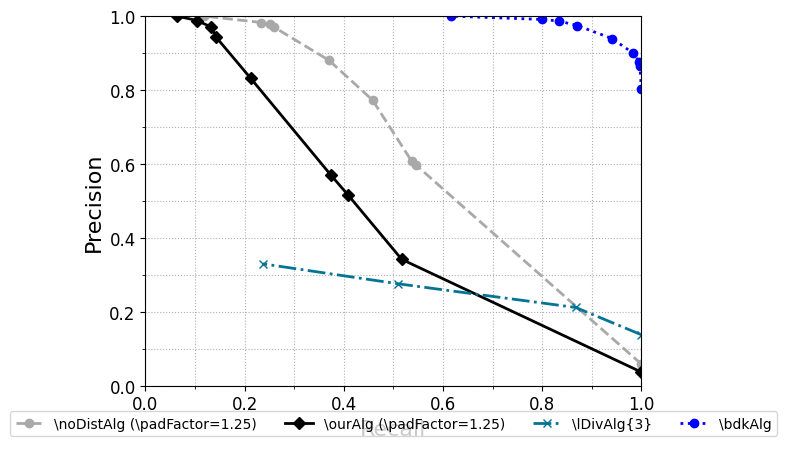

In [120]:
seq_len = 7
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

l = 3
pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 18 564
0.31737588652482257
('perfects', (306, 306, 383, 306, 383, 383, 383, 306))
Tau: 0; precision=0.05236252507238732, recall=1.0
Tau: 0.1; precision=0.2636691235378359, recall=0.8180042849072671
Tau: 0.2; precision=0.3133274424877792, recall=0.7227055843839384
Tau: 0.3; precision=0.9990477177263563, recall=0.1849937112324413
Tau: 0.5; precision=1.0, recall=0.18485423432637735
Tau: 0.75; precision=1.0, recall=0.18485423432637735
Tau: 0.8; precision=1.0, recall=0.18485423432637735
Tau: 0.9; precision=1.0, recall=0.18485423432637735
Tau: 1; precision=1.0, recall=0.18485423432637735
311
Counter({8: 588})
Target set size: 44; test set size: 588
number of words: 588
Len test seqs: 564
Len observed: 179
Len adversary: 21 564
0.31737588652482257
('perfects', (306, 306, 383, 306, 383, 383, 383, 306))
Tau: 0; precision=0.10575698183637758, recall=1.0
Tau: 0.1;

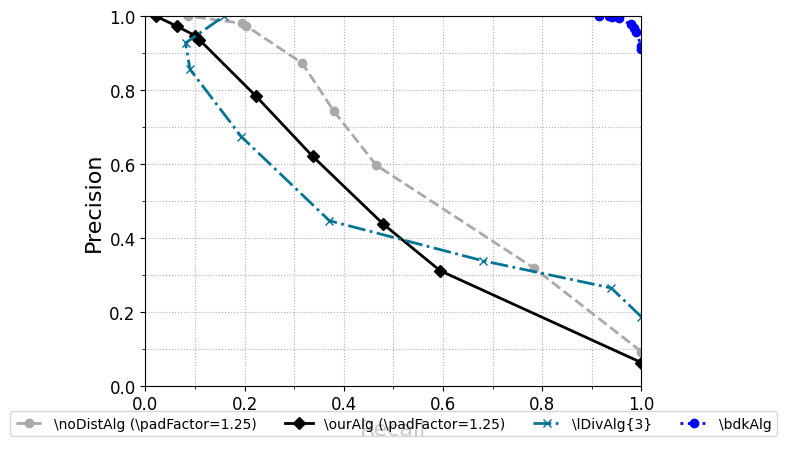

In [121]:
seq_len = 8
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 8 162
0.48765432098765443
('sheetings', (383, 306, 306, 306, 383, 306, 383, 383, 383))
Tau: 0; precision=0.273700843940823, recall=1.0
Tau: 0.1; precision=0.710429703532806, recall=0.8935516933916868
Tau: 0.2; precision=0.710429703532806, recall=0.8935516933916868
Tau: 0.3; precision=0.710429703532806, recall=0.8935516933916868
Tau: 0.5; precision=0.710429703532806, recall=0.8935516933916868
Tau: 0.75; precision=0.999553842360795, recall=0.36031033279900954
Tau: 0.8; precision=0.999553842360795, recall=0.36031033279900954
Tau: 0.9; precision=1.0, recall=0.35931221435482324
Tau: 1; precision=1.0, recall=0.35931221435482324
311
Counter({9: 168})
Target set size: 44; test set size: 168
number of words: 168
Len test seqs: 162
Len observed: 79
Len adversary: 4 162
0.48765432098765443
('sheetings', (383, 306, 306, 306, 383, 306, 383, 383, 383))
Tau: 0; precisi

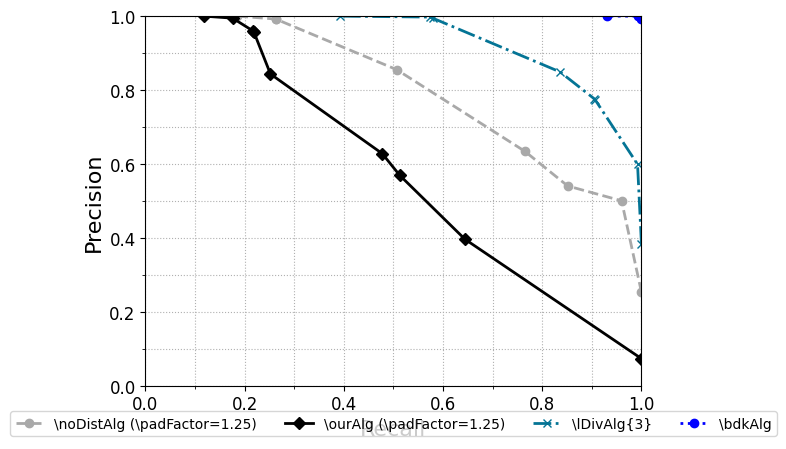

In [122]:
seq_len = 9
recall_precision_mp = precision_recall_autcomplete(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

l = 3
pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']
recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_autcomplete(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Linode from Index dataset

In [126]:
dataset = 'linode_from_index'
c = 1.25
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=10)

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 2.0
i_inf for target sequence length 3 = 6.169925001442312
i_inf for target sequence length 4 = 8.238404739325079
i_inf for target sequence length 5 = 6.599912842187128
i_inf for target sequence length 6 = 5.459431618637297
i_inf for target sequence length 7 = 2.0
Gurobi's optimization method runtime (in seconds): 0.4267580509185791
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 1.7369655941662063
i_inf for target sequence length 3 = 6.078002512001273
i_inf for target sequence length 4 = 8.070857015768077
i_inf for target sequence length 5 = 6.43977317964201
i_inf for target sequence length 6 = 5.459431618637296
i_inf for target sequence length 7 = 2.0
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed 10 runs of BDK.
1
2


Len test seqs: 774
Len observed: 76
Len adversary: 36 774
0.09819121447028431
(('http://192.168.80.128:3000/docs/', 'http://192.168.80.128:3000/docs/databases/', 'http://192.168.80.128:3000/docs/databases/mysql/create-physical-backups-of-your-mariadb-or-mysql-databases/'), (101680, 81339, 81339))
Tau: 0; precision=0.1147540983435538, recall=0.9999999987012987
Tau: 0.1; precision=0.17549668868361035, recall=0.688311687417777
Tau: 0.2; precision=0.25641025619110236, recall=0.3896103891044021
Tau: 0.3; precision=0.3478260854442344, recall=0.1038961037611739
Tau: 0.5; precision=0.4999999875000003, recall=0.025974025940293476
Tau: 0.75; precision=0.0, recall=0.0
Tau: 0.8; precision=0.0, recall=0.0
Tau: 0.9; precision=0.0, recall=0.0
Tau: 1; precision=0.0, recall=0.0
Len test seqs: 774
Len observed: 76
Len adversary: 38 774
0.09819121447028431
(('http://192.168.80.128:3000/docs/', 'http://192.168.80.128:3000/docs/databases/', 'http://192.168.80.128:3000/docs/databases/mysql/create-physical-b

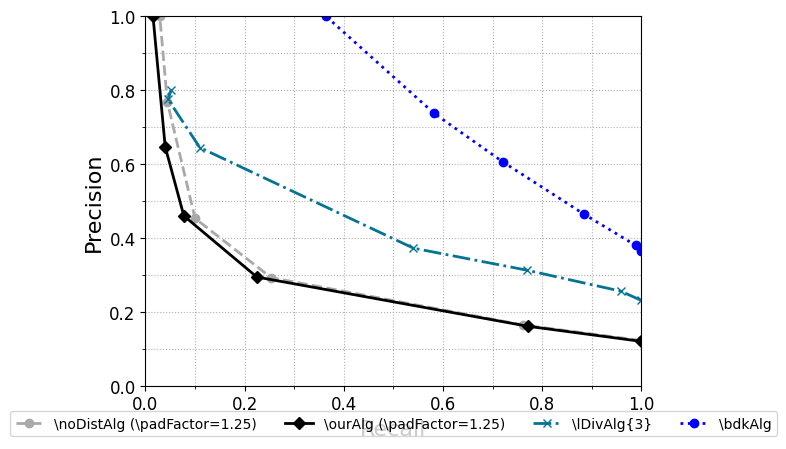

In [127]:
seq_len = 3
recall_precision_mp = precision_recall_linode_from_index(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_linode_from_index(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)

### Wikipedia Dataset

In [128]:
dataset = 'wikipedia'
c = 2
l = 3

plot_mp = {}

pad_scheme_pwod, _ = run_pwod(dataset, c)
pad_scheme_pfs = run_pfs(dataset, c)['pad_scheme']

pad_scheme_bdk, _, _, _, _, _ = run_bdk(dataset, num_trials=10)

pad_scheme_mvmd = run_mvmd(dataset, l)['pad_scheme']

pad_scheme_bdk_flat = {k: v[0][0] for k,v in pad_scheme_bdk.items()}
pad_scheme_flat_pwod = {k: v[0][0] for k, v in pad_scheme_pwod.items() }

i_inf for target sequence length 1 = 2.584962500721156
i_inf for target sequence length 2 = 4.906890595608519
i_inf for target sequence length 3 = 6.977279923499917
i_inf for target sequence length 4 = 8.727920454563199
i_inf for target sequence length 5 = 9.92035285541508
i_inf for target sequence length 6 = 10.599912842187127
i_inf for target sequence length 7 = 10.896332403909941
Gurobi's optimization method runtime (in seconds): 30.629555225372314
i_inf for target sequence length 1 = 3.000000000003619
i_inf for target sequence length 2 = 5.392317422781391
i_inf for target sequence length 3 = 7.285980105930573
i_inf for target sequence length 4 = 8.898010849849229
i_inf for target sequence length 5 = 10.04108960499966
i_inf for target sequence length 6 = 10.68585578548294
i_inf for target sequence length 7 = 10.969600121534395
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 

len test: 4297; len of target: 214
14105363.0
Len test seqs: 4297
Len observed: 1906
Len adversary: 137 4297
0.4435652781010005
(('/wiki/Buddhism', '/wiki/Mandaeism', '/wiki/Yarsanism', '/wiki/Iran', '/wiki/Middle_East', '/wiki/Egypt', '/wiki/Architecture_of_Egypt'), (1745780, 871287, 435528, 1745780, 871287, 1745780, 435528))
Tau: 0; precision=0.2452638072561393, recall=0.9999999999999929
Tau: 0.1; precision=0.6017881769672118, recall=0.8523289333284024
Tau: 0.2; precision=0.6981832826061273, recall=0.822282306989997
Tau: 0.3; precision=0.7758940752095967, recall=0.7826093015624062
Tau: 0.5; precision=0.8983731672946823, recall=0.6869515719456648
Tau: 0.75; precision=0.9985152419227895, recall=0.5870479496749831
Tau: 0.8; precision=0.9985152419227895, recall=0.5870479496749831
Tau: 0.9; precision=0.9999999999999879, recall=0.5821950437270823
Tau: 1; precision=0.9999999999999879, recall=0.5821950437270823
len test: 4297; len of target: 214
12738135.571428573
Len test seqs: 4297
Len obs

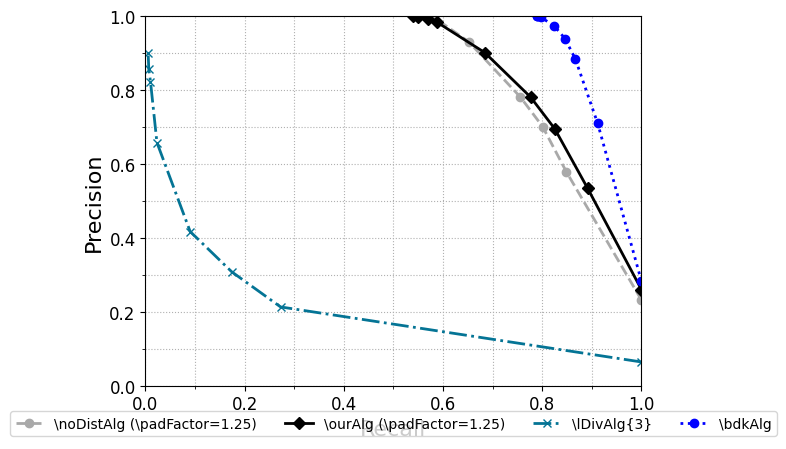

In [129]:
seq_len = 7
recall_precision_mp = precision_recall_wiki(pad_scheme_flat_pwod, seq_len=seq_len, method=f'pwod{c}')
plot_mp['\\noDistAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_pfs, seq_len=seq_len, method=f'lp-prefix(c={c})')
plot_mp['\\ourAlg (\\padFactor=1.25)'] = recall_precision_mp

recall_precision_mp = compute_precision_recall_ldiv_pad_scheme(l, pad_scheme_mvmd, seq_len, dataset)
plot_mp['\\lDivAlg{3}'] = recall_precision_mp

recall_precision_mp = precision_recall_wiki(pad_scheme_bdk_flat, seq_len=seq_len, method='Backes, et al.')
plot_mp['\\bdkAlg'] = recall_precision_mp

plot_precision_recall(plot_mp)